<a href="https://colab.research.google.com/github/Shravikajain/Ai-S/blob/master/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###forcasting fundamentals

###Getting data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-10-23 09:26:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2024-10-23 09:26:38 (4.17 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



###importing with pandas

In [ ]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates =["Date"],
                 index_col = ["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

### Visualising Data

In [ ]:
#only closing price

bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns = {"Closing Price (USD)":"Price"})

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


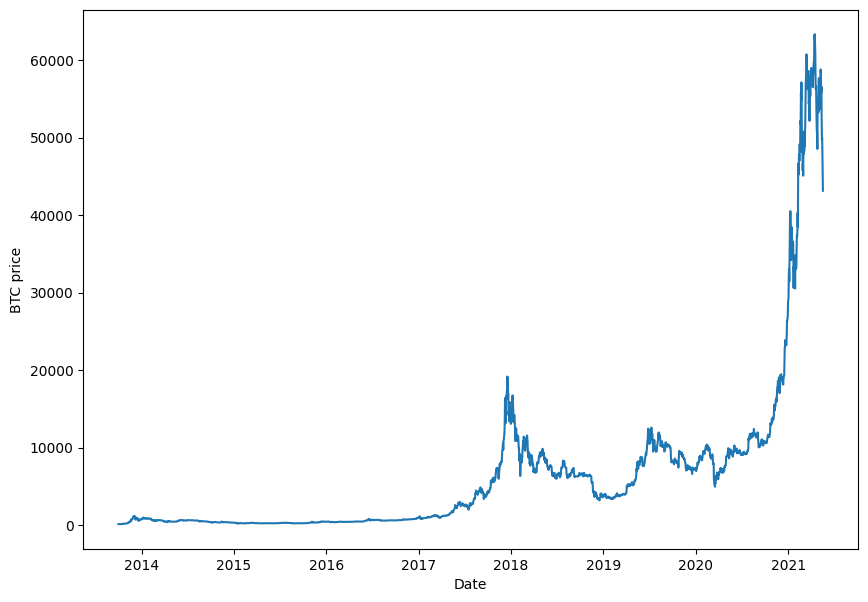

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.ylabel("BTC price")
plt.xlabel("Date")
plt.plot(bitcoin_prices)

### Importing time series with Python Csv module

In [ ]:
#importing an formating historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f,delimiter = ",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

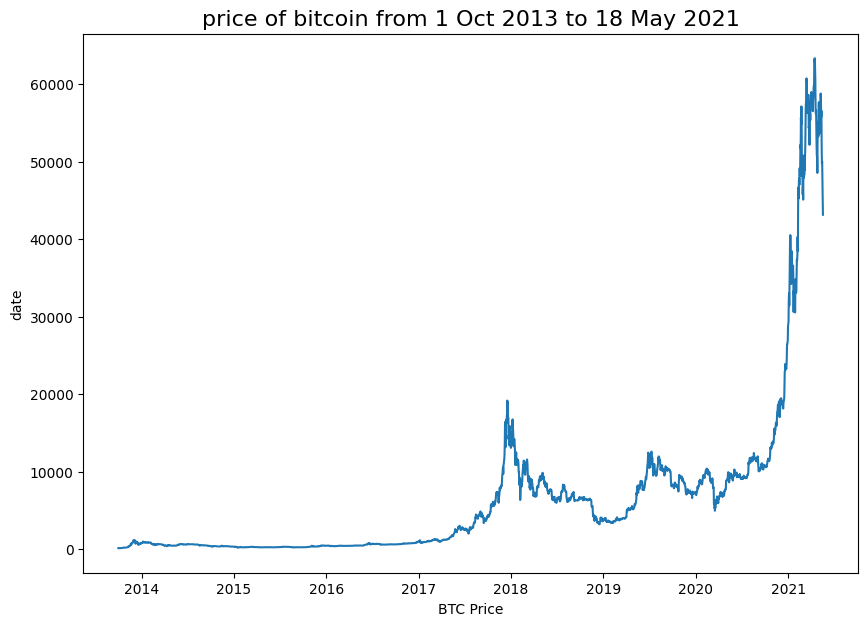

In [ ]:
#Plot form csv

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10,7))
plt.plot(timesteps , btc_price)
plt.xlabel("BTC Price")
plt.title("price of bitcoin from 1 Oct 2013 to 18 May 2021", fontsize = 16)
plt.ylabel("date")
plt.show()


In [ ]:
train_index = int(len(df)*0.8)
train_df  = df[:train_index]
test_df = df[train_index:]

In [ ]:
len(train_df)

2229

In [ ]:
len(test_df)

558

### Format data part1: Creating test and train data

In [ ]:
# creating train and test sets with time series data(the wrong way)


In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
#Wrong way

from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(timesteps,
                                                      prices,
                                                      test_size = 0.2,
                                                      random_state = 42)
x_train.shape , x_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

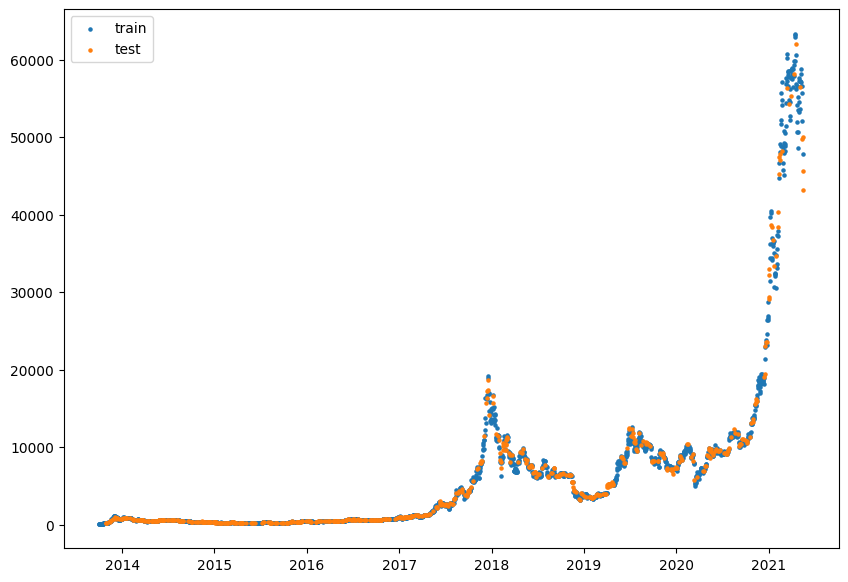

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(x_train,y_train,s = 5,label = "train")
plt.scatter(x_test,y_test,s = 5,label = "test")
plt.legend()
plt.show()


# create train and test for time series

In [ ]:
#Create train and test splits the right way for time series data
split_size = int(0.8*len(prices))

x_train, y_train = timesteps[:split_size],prices[:split_size]
x_test, y_test = timesteps[split_size:],prices[split_size:]

len(x_train),len(y_train),len(x_test),len(y_test)


(2229, 2229, 558, 558)

In [ ]:
#Creating plotting function
def plot_time_series(timesteps , values , format = "." , start = 0 , end = None , label = None):
  # parameters:
  # timesteps: array of timesteps values
  # values: array of values across the time
  # format: style of plot ,defualt
  # end: where to end the plot (similiar to start but for end)
  #label : label to show on plot
  # plt.figure(figsize = (10,7))
  plt.plot(timesteps[start:end],values[start:end],format,label= label)
  plt.xlabel("Time")
  plt.ylabel("BTC label")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

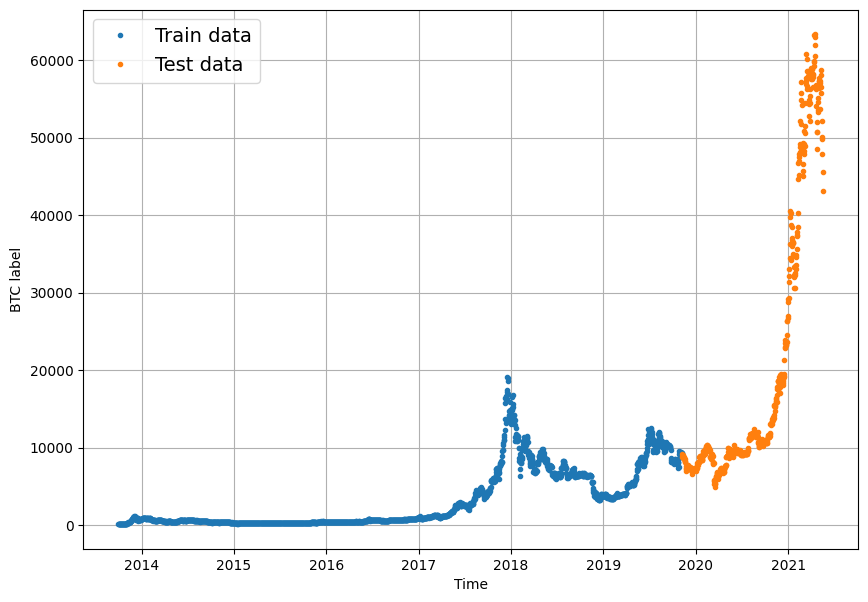

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_train,values = y_train,label = "Train data")
plot_time_series(timesteps = x_test,values = y_test,label = "Test data")

In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
# Creating naive forecast

naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

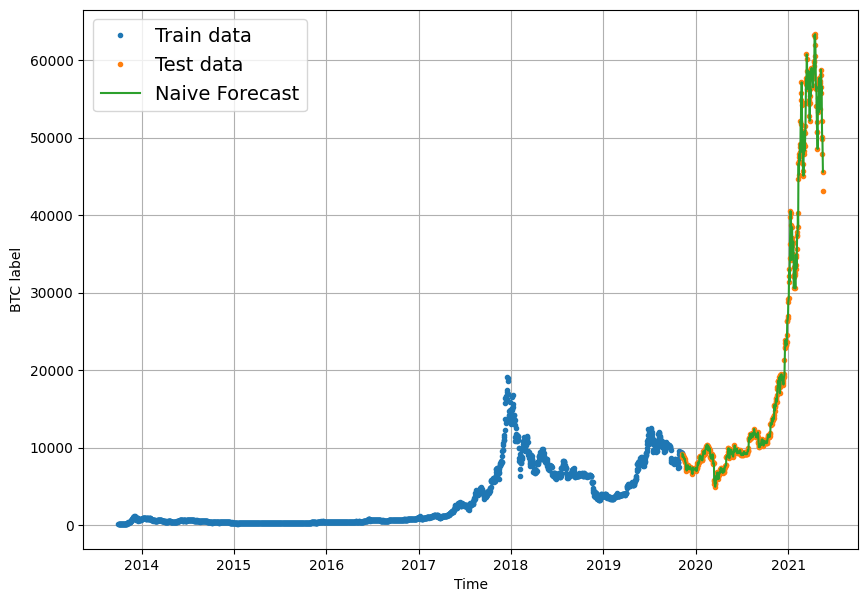

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_train , values = y_train  , label = "Train data" )
plot_time_series(timesteps = x_test , values = y_test , label = "Test data")
plot_time_series(timesteps  = x_test[1:], values = naive_forecast , format = '-', label ="Naive Forecast")


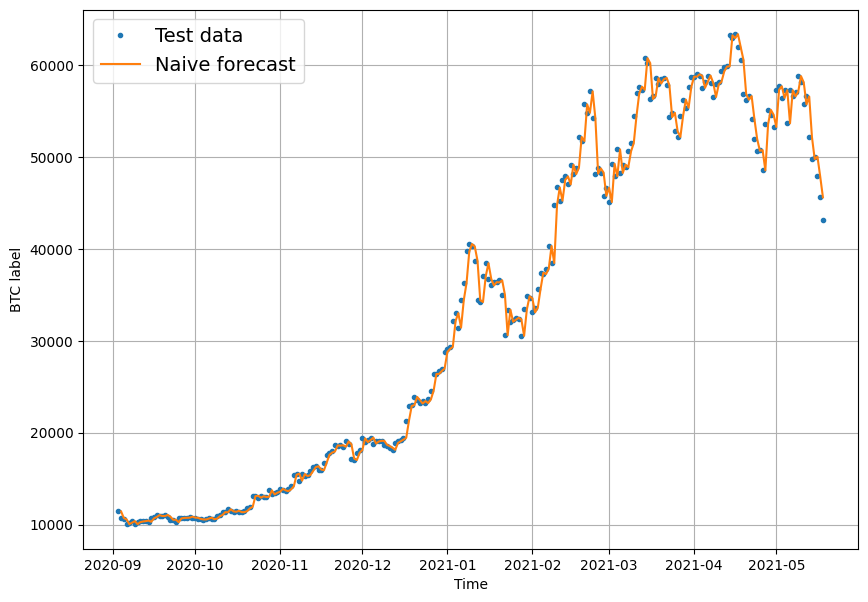

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast")

In [ ]:
#Evaluating a time series model

### Implementation of Mase in tensorflow


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation asuuming no seasonality of data
def mean_absolute_scaled_error(y_true , y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred)) # assusming no seasonality of data
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # our seasonality in one day(1 shift)
  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
    # Ensure data type is float32 for calculations
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))  # Mean Absolute Error
    mse = tf.reduce_mean(tf.square(y_true - y_pred))  # Mean Squared Error
    rmse = tf.sqrt(mse)  # Root Mean Squared Error
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                              y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### format data part 2 : windowing our data

We window our time series dataset  to convert data into suverpised learning problem

# Windowing data for 1 week --
[0,1,2,3,4,5,6] --> [7]
[1,2,3,4,5,6,7] --> [8]


In [ ]:
x_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
print(f"we want to use this : {btc_price[:7]} to predict this {btc_price[7]}")

we want to use this : [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [ ]:
#setup global variables for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7


In [ ]:
#create function to label window data
def get_labelled_window(x, horizon = 1):
  return x[:,:-horizon] , x[:,-horizon:]

In [ ]:
test_window , test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis = 0),horizon = HORIZON)
print(f"Window : {tf.squeeze(test_window).numpy()} --> label : {tf.squeeze(test_label).numpy()}")

Window : [0 1 2 3 4 5 6] --> label : 7


In [ ]:
import numpy as np

In [ ]:
def make_windows(x, window_size = 7 , horizon = 1):
  # turns a 1D array to 2D array of sequential labelled windows of window_size with horizon size labels.

  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon -1)) ,axis = 0 ).T
  # print(f"window indexes : \n {window_indexes,window_indexes.shape}")
  windowed_array = x[window_indexes]

  windows , labels = get_labelled_window(windowed_array , horizon = horizon)
  return windows , labels

In [ ]:
full_windows , full_labels = make_windows(prices , window_size= WINDOW_SIZE , horizon = HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
np.arange(WINDOW_SIZE , HORIZON)

array([], dtype=int64)

In [ ]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
np.expand_dims(np.arange(8),axis = 0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
len(prices)

2787

In [ ]:
make_windows(prices , window_size = WINDOW_SIZE , horizon= HORIZON)

(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [ ]:
for i in range(3):
  print(f"Window :{full_windows[i-3]} --> label : {full_labels[i-3]}")

Window :[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] --> label : [47885.62525472]
Window :[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] --> label : [45604.61575361]
Window :[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] --> label : [43144.47129086]


In [ ]:
prices[-1]

43144.4712908603

In [ ]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


# Turning windows into training and test sets

In [ ]:
full_windows[:5] , full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Make the  train/test splits
def make_train_test_splits(windows , labels , test_split = 0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows , train_labels , test_windows , test_labels


In [ ]:
train_windows , train_labels, test_windows , test_labels = make_train_test_splits(full_windows , full_labels) # Corrected the order of variables to match the return statement
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
len(full_windows)*0.8

2224.0

In [ ]:
train_windows[:5] , train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [ ]:
y_train

array([ 123.65499   ,  125.455     ,  108.58483   , ..., 9369.62808116,
       9326.59962378, 9335.75240233])

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
np.squeeze(train_labels[:5]).shape

(5,)

In [ ]:
## Make a modelling checkpoint

In [ ]:
import os

#create a function to implement a ModelCheckpoint

In [ ]:
def create_model_checkpoint(model_name , save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name) +".keras",
                                            verbose = 0 ,
                                            save_best_only = True)

In [ ]:
## Model 1 : Dense model(window = 7 , horizon = 1 )

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import layers


In [ ]:
tf.random.set_seed(42)

In [ ]:
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation = "relu"),
    layers.Dense(HORIZON , activation = "linear")
], name = "model_1_dense")

model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics =["mae" , "mse"])

In [ ]:
model_1.fit(x = train_windows,
            y = train_labels ,
            epochs = 100,
            verbose = 0 ,
            batch_size = 128,
            validation_data = (test_windows , test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

In [ ]:
model_1.evaluate(test_windows , test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288.3385 - mae: 288.3385 - mse: 348064.7812


[574.5193481445312, 574.5193481445312, 1181898.875]

In [ ]:
model_1.save("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 288.3385 - mae: 288.3385 - mse: 348064.7812


[574.5193481445312, 574.5193481445312, 1181898.875]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras") # or model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.h5")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 288.3385 - mae: 288.3385 - mse: 348064.7812 


[574.5193481445312, 574.5193481445312, 1181898.875]

In [ ]:
def make_preds(model , input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8880.385, 8829.422, 9074.622, 8810.931, 8766.279, 8744.854,
        8714.473, 8550.486, 8485.706, 8556.65 ], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 574.51935,
 'mse': 1181898.9,
 'rmse': 1087.1517,
 'mape': 2.5834816,
 'mase': 1.0092714}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
x_test[-len(test_windows):]

array(['2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-18T00:00:00.000000000', '2019-11-19T00:00:00.000000000',
       '2019-11-20T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000', '2019-11-23T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-11-27T00:00:00.000000000',
       '2019-11-28T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-12-07

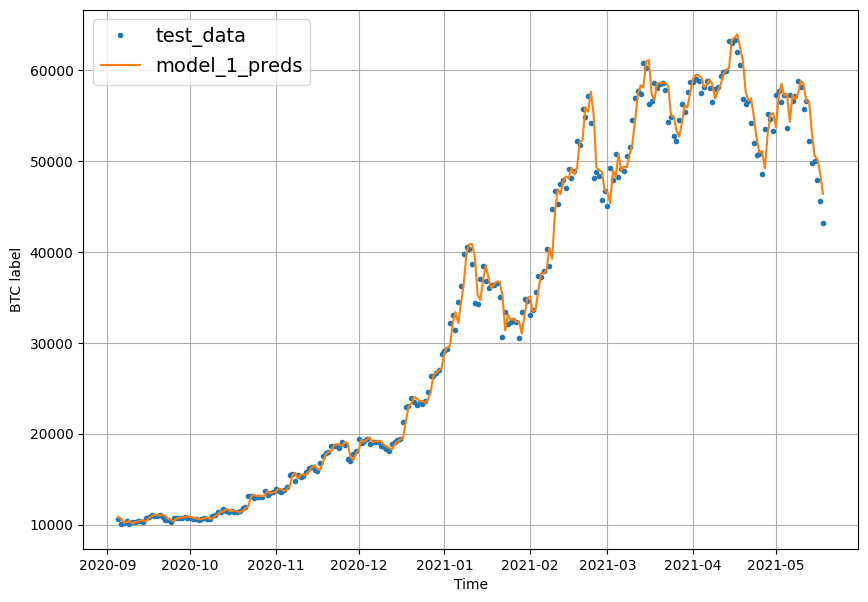

In [ ]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps = x_test[-len(test_windows):],values = test_labels[:,0],start = offset , label = "test_data")
plot_time_series(timesteps = x_test[-len(test_windows):], values= model_1_preds , start = offset , format = "-", label = "model_1_preds")

### Model 2 : Dense(Window = 30 , horizon = 1)

In [ ]:
horizon = 1
window_size = 30

In [ ]:
full_windows , full_labels = make_windows(prices , window_size = window_size , horizon = horizon)
len(full_windows) , len(full_labels)

(2757, 2757)

In [ ]:
train_windows , train_labels , test_windows , test_labels = make_train_test_splits(windows = full_windows , labels = full_labels )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_2 = tf.keras.Sequential([
    layers.Dense(128 , activation = "relu"),
    layers.Dense(horizon)],
     name = "model_2_dense")

In [ ]:
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_2.fit(train_windows,
            train_labels ,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data =(test_windows , test_labels ),
            callbacks  = [create_model_checkpoint(model_2.name)])

In [ ]:
model_2.evaluate(test_windows , test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 363.8371 


699.548095703125

In [ ]:
model_2_preds  = make_preds(model_2 ,
                            input_data = test_windows)
model_2_preds[:10]


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8690.039 , 8675.976 , 8598.838 , 8549.085 , 8230.861 , 8175.7134,
       8071.051 , 7957.4307, 7948.4077, 7648.765 ], dtype=float32)>

In [ ]:
model_2_results  = evaluate_preds(y_true  = tf.squeeze(test_labels),
                                  y_pred = model_2_preds)
model_2_results

{'mae': 699.5481,
 'mse': 1533568.9,
 'rmse': 1238.3735,
 'mape': 3.2640536,
 'mase': 1.2228168}

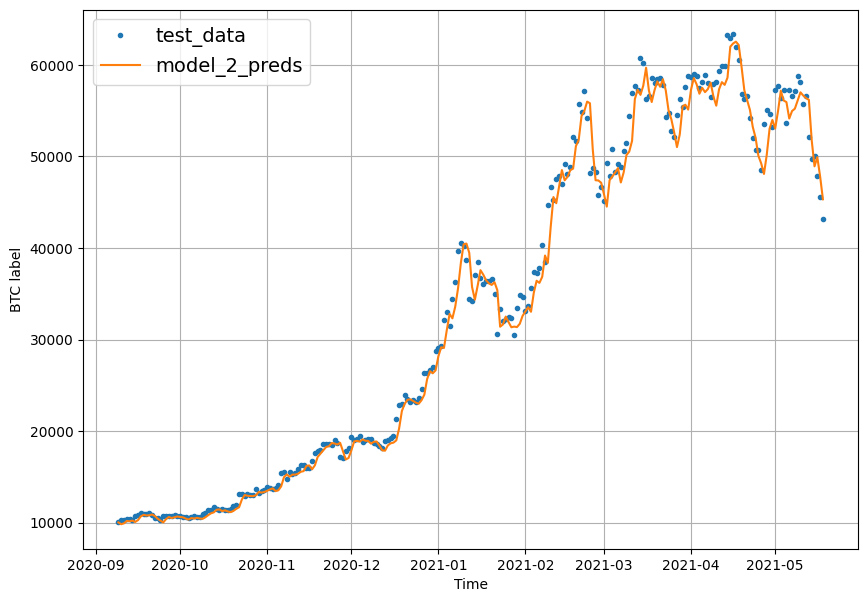

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))

plot_time_series(timesteps = x_test[-len(test_windows):], values= test_labels[:,0], start=offset, label="test_data")
plot_time_series(timesteps = x_test[-len(test_windows):], values= model_2_preds, start=offset, format="-", label="model_2_preds")

### model 3

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits time series data into training and testing sets.

    Args:
        windows (np.ndarray): The time series data windows.
        labels (np.ndarray): The corresponding labels for the windows.
        test_split (float): The proportion of data to use for testing.

    Returns:
        tuple: A tuple containing the training windows, testing windows,
               training labels, and testing labels.
    """
    # Calculate the split index
    split_index = int(len(windows) * (1 - test_split))
      # added line

    # Split the data
    train_windows = windows[:split_index]
    test_windows = windows[split_index:]
    train_labels = labels[:split_index]
    test_labels = labels[split_index:]

    return train_windows, test_windows, train_labels, test_labels

In [ ]:
horizon = 7
window_size = 30

In [ ]:
full_windows, full_labels = make_windows(prices , window_size  = window_size , horizon = horizon )
len(full_windows) , len(full_labels)

(2751, 2751)

In [ ]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows = full_windows , labels = full_labels , test_split = 0.2 )
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_3 = tf.keras.Sequential([
     layers.Dense(128, activation = "relu"),
     layers.Dense(horizon)
], name = "model_3_dense")

In [ ]:
model_3.compile(loss = "mae",
                optimizer  = tf.keras.optimizers.Adam())

In [ ]:
model_3.fit(train_windows,
          train_labels,
          batch_size = 128,
          epochs = 100,
          verbose = 0,
          validation_data = (test_windows , test_labels),
          callbacks = [create_model_checkpoint(model_3.name)])

In [ ]:
model_3.evaluate(test_windows , test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 646.5211 


1256.528076171875

In [ ]:
model_3_preds = make_preds(model_3 , input_data = test_windows)
model_3_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[9518.711 , 9493.395 , 9582.572 , 9453.97  , 9600.67  , 9317.489 ,
        9156.625 ],
       [9188.904 , 9048.875 , 9158.402 , 9236.894 , 9315.36  , 9185.273 ,
        8899.258 ],
       [8979.433 , 8806.155 , 8913.122 , 9041.928 , 9029.9795, 9252.874 ,
        8908.255 ],
       [9065.523 , 9138.654 , 9148.499 , 9191.206 , 9226.922 , 9309.761 ,
        8993.958 ],
       [8996.804 , 9111.723 , 9277.522 , 9234.981 , 9194.997 , 9133.892 ,
        8826.261 ],
       [9002.029 , 8993.429 , 9112.2295, 9197.536 , 9051.461 , 8823.206 ,
        8646.739 ],
       [9091.424 , 9057.224 , 9190.565 , 9120.352 , 9073.012 , 8691.708 ,
        8533.312 ],
       [8943.91  , 8836.844 , 8988.18  , 8860.701 , 8980.737 , 8693.059 ,
        8505.375 ],
       [8781.806 , 8504.551 , 8671.33  , 8716.473 , 8771.79  , 8684.56  ,
        8376.06  ],
       [8599.68  , 8365.732 , 8423.413 , 8653.547 , 8544.715 , 8591.23  ,
        8270.096 ]], dtype=floa

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1256.528,
 'mse': 5468973.5,
 'rmse': 2338.5837,
 'mape': 5.7435336,
 'mase': 2.235921}

In [ ]:
offset = 300
plt.figure(figsize = (10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

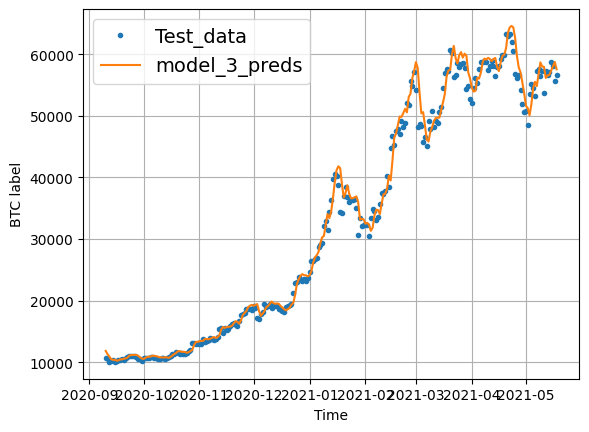

In [ ]:
plot_time_series(timesteps = x_test[-len(test_windows):], values = test_labels[:,0], start = offset , label = "Test_data")
plot_time_series(timesteps = x_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds,axis = 1) , start = offset , format = "-" , label = "model_3_preds")

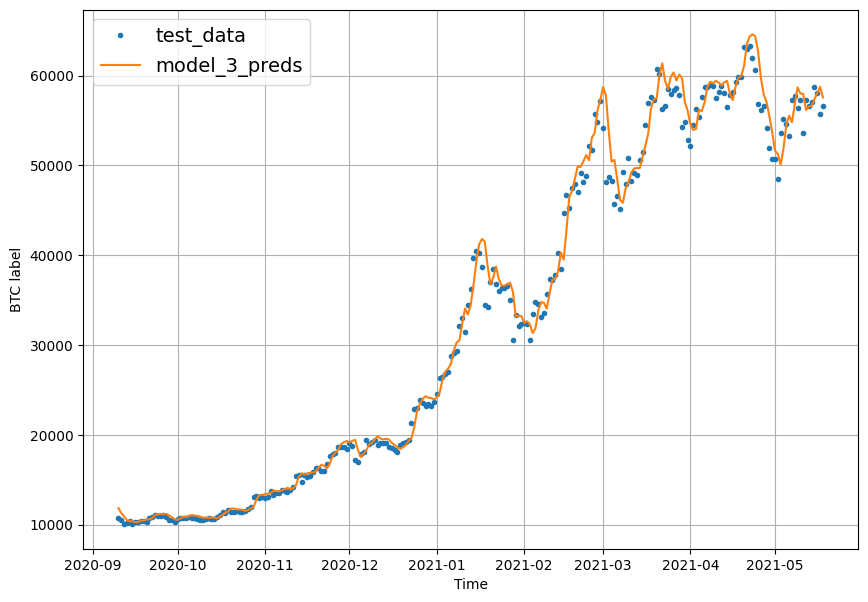

In [ ]:
offset = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "test_data")
plot_time_series(timesteps = x_test[-len(test_windows):],
                 values = tf.reduce_mean(model_3_preds , axis = 1),
                 format  = "-",
                 start = offset ,
                 label = "model_3_preds")


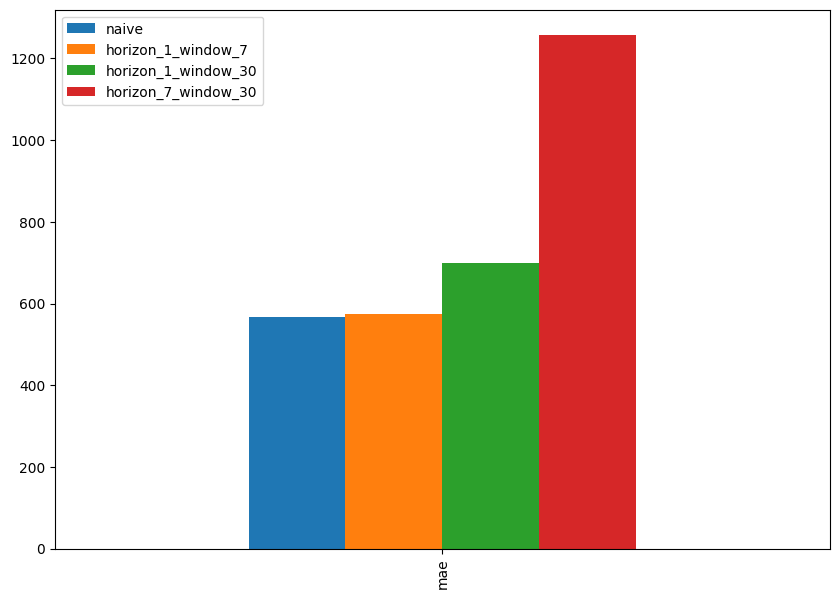

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
             "horizon_1_window_7": model_1_results["mae"],
             "horizon_1_window_30": model_2_results["mae"],
             "horizon_7_window_30": model_3_results["mae"]}, index = ["mae"]).plot(figsize = (10,7), kind = "bar");

In [ ]:
horizon = 1
window_size = 7

In [ ]:
full_windows , full_labels = make_windows(prices , window_size = window_size , horizon = horizon)
len(full_windows) , len(full_labels)

(2780, 2780)

In [ ]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows , full_labels)
len(train_windows) , len(test_windows) , len(train_labels) , len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
x  = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape : {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape: \n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape : (7, 1)
Original values with expanded shape: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential(
    [
        layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
        layers.Conv1D(filters = 128 ,kernel_size = 5 , padding = "causal" , activation = "relu"),
        layers.Dense(horizon)
    ], name = "model_4_conv1D"
)

In [ ]:
model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows , test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [ ]:
# model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 286.0965 


573.170654296875

In [ ]:
model_4_preds = make_preds(model_4 , test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8886.768, 8772.885, 8998.589, 8801.568, 8718.698, 8725.421,
       8686.35 , 8524.735, 8451.61 , 8513.868], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'mae': 573.17065,
 'mse': 1190588.2,
 'rmse': 1091.1407,
 'mape': 2.560834,
 'mase': 1.0069021}

In [ ]:
model_1_results

{'mae': 574.51935,
 'mse': 1181898.9,
 'rmse': 1087.1517,
 'mape': 2.5834816,
 'mase': 1.0092714}

In [ ]:
tf.random.set_seed(42)

In [ ]:
inputs = layers.Input(shape = (window_size,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))(inputs)
# x = layers.LSTM(128 , return_sequences  = True)(x)
x = layers.LSTM(128 , activation = "relu")(x)
# x = layers.Dense(32 , activation = "relu")(x)
output = layers.Dense(horizon)(x)
model_5 = tf.keras.Model(inputs = inputs , outputs = output , name = "model_5_LSTM")

In [ ]:
model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

In [ ]:
model_5.fit(train_windows,
            train_labels,
            epochs = 100,
            verbose = 0,
            batch_size = 128 ,
            validation_data = (test_windows , test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

In [ ]:
# model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299.5023 


601.7588500976562

In [ ]:
model_5_preds = make_preds(model_5 , test_windows)
model_5_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8888.606, 8756.275, 8934.89 , 8751.229, 8684.349], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 601.75885,
 'mse': 1261818.1,
 'rmse': 1123.3068,
 'mape': 2.6925228,
 'mase': 1.0571237}

### Multi variate time series function

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days , block_reward_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block  = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:]


,Price,block_reward
Date,,
2013-10-01,123.654990,None
2013-10-02,125.455000,None
2013-10-03,108.584830,None
2013-10-04,118.674660,None
2013-10-05,121.338660,None
...,...,...
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days: block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days: ,-1] = block_reward_4
bitcoin_prices_block.head()


,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


Reward vs price over the time

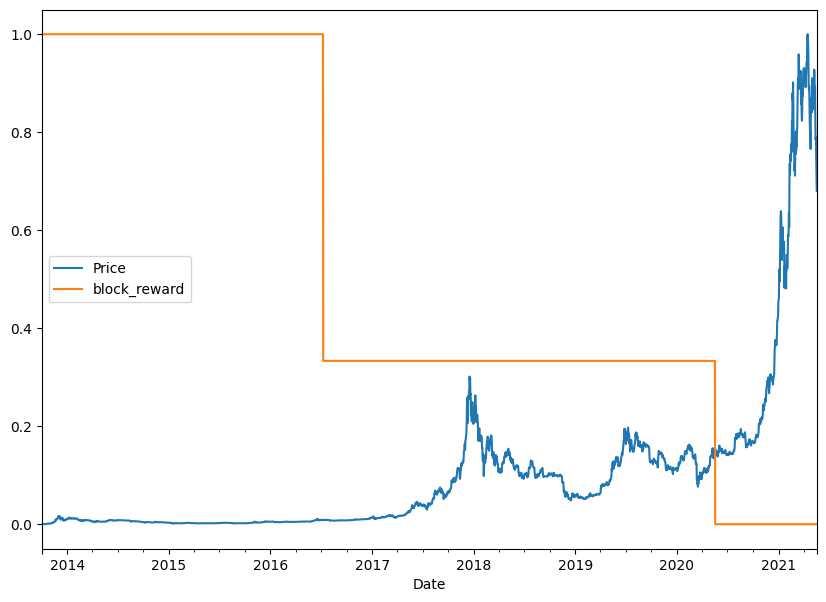

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price" , "block_reward"]]),

                                                  columns = bitcoin_prices_block.columns,
                                                  index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize = (10,7));


In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# Create date ranges of where specific block_reward values should be

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days , -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days : block_reward_3_days , -1] = block_reward_3

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.iloc[1500:1550]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5
2017-11-14,6666.27125,12.5
2017-11-15,6867.42625,12.5
2017-11-16,7259.30000,12.5
2017-11-17,7924.18250,12.5


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,None
2021-05-15,50032.693137,None
2021-05-16,47885.625255,None
2021-05-17,45604.615754,None
2021-05-18,43144.471291,None


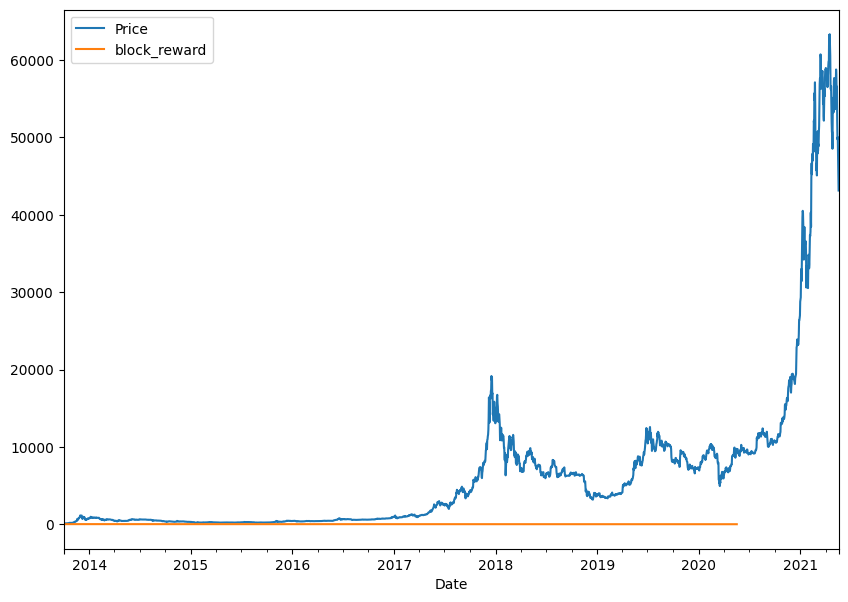

In [ ]:
bitcoin_prices_block.plot(figsize = (10,7));

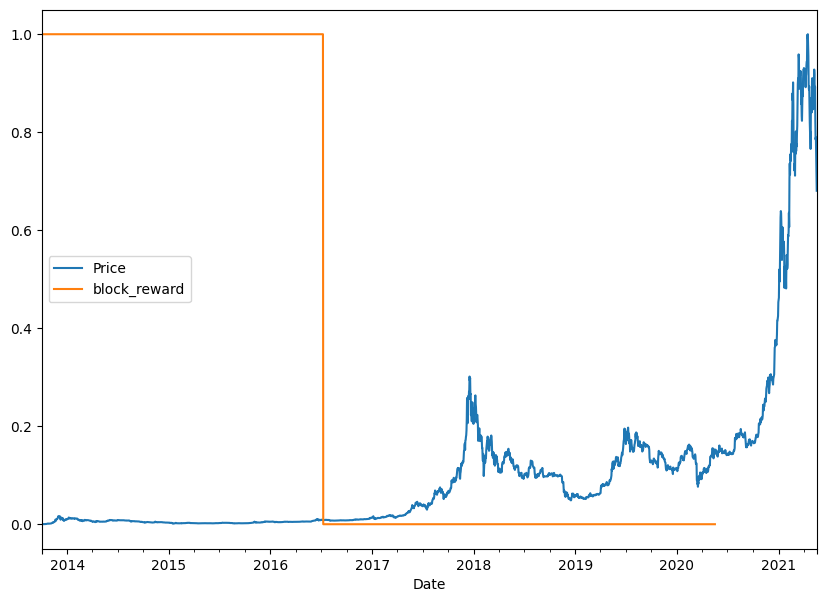

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price" ,"block_reward"]]),
                                    columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize =(10,7));

## Making a windowed dataset with pandas

Previously , we've turned our univariate time series into
windowed dataset using the helper functions above.

However ,since we've got  multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.

In [ ]:
#Setup dataset hyperparameters|

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
